In [1]:
from logreg import LogisticRegression

import numpy as np
import matplotlib.pyplot as plt

In [2]:
import ipywidgets as widgets
from ipywidgets import HBox, VBox
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

### Generating Training data

In [3]:
split_line=0.7

In [4]:
# Training Data
x_train = np.random.random(500)
y_train = np.array(list(map(lambda x: 1 if x > split_line else 0, x_train)))

x_train = x_train.reshape((x_train.shape[0], 1))
y_train = y_train.reshape((y_train.shape[0], 1))

print (f"number of samples : {x_train.shape[0]}")
print (f"number of features: {x_train.shape[1]}")

number of samples : 500
number of features: 1


(0.0, 1.0)

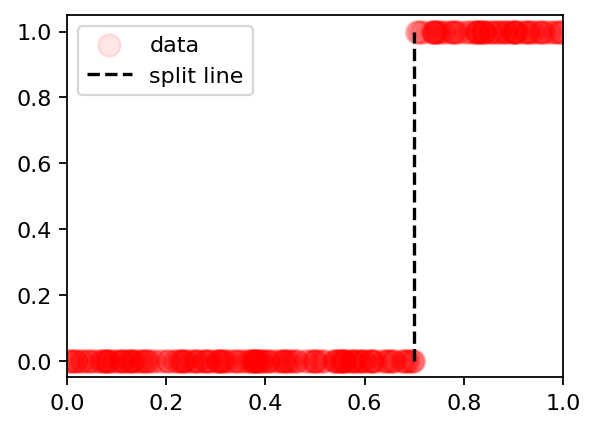

In [5]:
plt.figure(figsize=(4, 3), dpi=160)
plt.scatter(x_train, y_train, c='r', marker='o', alpha=0.1, s=100, label='data')
plt.plot([split_line, split_line], [0, 1], c='k', linestyle='dashed', label='split line')
plt.legend()
plt.xlim((0, 1))

### Model initialization and training

In [6]:
# Logistic Regression Model
logReg = LogisticRegression(
            lr=0.1,
            ld=0.000,
            batch_size=16,
            epochs=1000
        )

logReg.set_verbosity(1)
losses, accuracy = logReg.train(x_train, y_train)

training done, loss: 0.07106992799174298, acc: 1.0		


In [7]:
print(f"accuracy on training data -> {logReg.calc_accuracy(x_train, y_train)}")

accuracy on training data -> 1.0


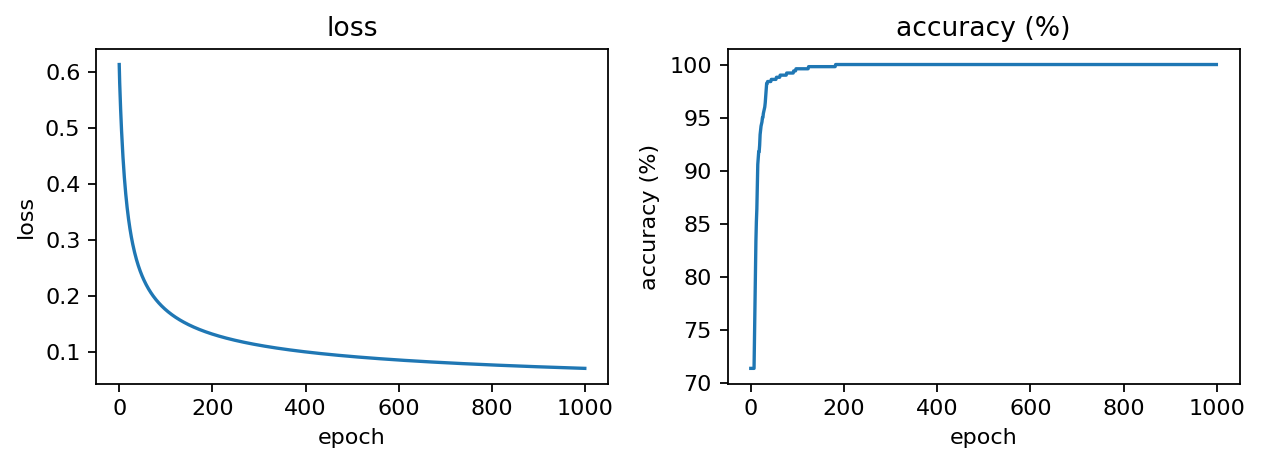

In [8]:
# Testing and plots
# x_test = np.expand_dims(np.array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]), -1)
# y_test = logReg.predict_bin(x_test)
# print (f"x_test: {x_test}\ny_test: {y_test}\n")

x_plot = np.expand_dims(np.arange(0.0, 1.2, 0.01), -1)
y_plot = logReg.predict(x_plot)

x_plot = x_plot.reshape((x_plot.shape[0],))
y_plot = y_plot.reshape((y_plot.shape[0],))

fig = plt.figure(figsize=(8, 3), dpi=160)
axl, axr = fig.subplots(1, 2)
axl.plot([x for x in range(len(losses))], losses)
axl.set_xlabel('epoch')
axl.set_ylabel('loss')
axl.set_title('loss')

axr.plot([x for x in range(len(accuracy))], [acc*100 for acc in accuracy])
axr.set_xlabel('epoch')
axr.set_ylabel('accuracy (%)')
axr.set_title('accuracy (%)')
fig.tight_layout()

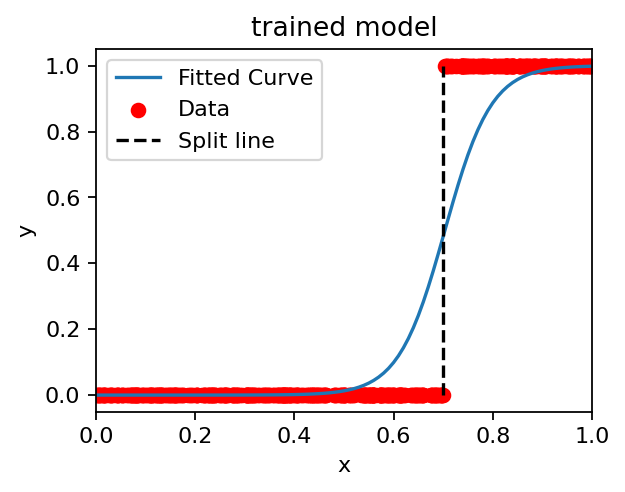

In [9]:
plt.figure(figsize=(4, 3), dpi=160)
plt.plot(x_plot, y_plot, label='Fitted Curve')
plt.scatter(x_train, y_train, c='r', label='Data')
plt.plot([split_line, split_line], [0, 1], c='k', linestyle='dashed', label='Split line')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((0, 1))
plt.title('trained model')
plt.show()